In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
sale1 = pd.read_csv('../')
sale2 = pd.read_csv('File 02 - Sales Data.csv')
product = pd.read_csv('Product.csv')
retailer = pd.read_csv('Retailer.csv')
#merge together in sales
sales = pd.concat([sale1,sale2])

In [3]:
from scipy.sparse.linalg import svds

In [4]:
import seaborn as sns

#  pre-Analysis

## Retailer data descriptive statistics

In [5]:
retailer.head()

,Retailer Code,Sub Ret Cat Name,Zone Name,Region Name,Territory Name
0,ATHU0001,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
1,ATHU0003,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
2,ATHU0005,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
3,ATHU0006,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
4,ATHU0007,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA


In [6]:
retailer.shape

(6118, 5)

In [7]:
retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 5 columns):
Retailer Code       6110 non-null object
Sub Ret Cat Name    5872 non-null object
Zone Name           6110 non-null object
Region Name         6110 non-null object
Territory Name      6118 non-null object
dtypes: object(5)
memory usage: 239.1+ KB


#### select the missing values rows

In [8]:
# need to be drop
retailer[retailer.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 554 to 5520
Data columns (total 5 columns):
Retailer Code       238 non-null object
Sub Ret Cat Name    0 non-null object
Zone Name           238 non-null object
Region Name         238 non-null object
Territory Name      246 non-null object
dtypes: object(5)
memory usage: 11.5+ KB


#### missing values bar chart

In [9]:
retailer[retailer.isnull().any(axis=1)].count()

Retailer Code       238
Sub Ret Cat Name      0
Zone Name           238
Region Name         238
Territory Name      246
dtype: int64

# Descriptive Statictics for Product data

In [10]:
product.head()

,Product Code,Product Description,Product Group Name,Brand Name,Sub Product Description
0,500003,BIEN AIME COLOGNE 50ML,Cologne,Bien Aime,REGULAR COLOGNE
1,500004,BIEN AIME COLOGNE 100ML,Cologne,Bien Aime,REGULAR COLOGNE
2,500031,BABY CHERAMY SHAMPOO 125ML old,SHAMPOO,Baby Cheramy,REGULAR SHAMPOO
3,500034,BIEN AIME COLOGNE 200ML,Cologne,Bien Aime,REGULAR COLOGNE
4,500047,BABY CHERAMY PRICKLY HEAT 100G,Talc & Powder,Baby Cheramy,PRICKLY HEAT TALC


In [11]:
product.shape

(457, 5)

In [12]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 5 columns):
Product Code               457 non-null int64
Product Description        457 non-null object
Product Group Name         457 non-null object
Brand Name                 457 non-null object
Sub Product Description    457 non-null object
dtypes: int64(1), object(4)
memory usage: 17.9+ KB


#### select the missing values rows

In [13]:
product[product.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
Product Code               0 non-null int64
Product Description        0 non-null object
Product Group Name         0 non-null object
Brand Name                 0 non-null object
Sub Product Description    0 non-null object
dtypes: int64(1), object(4)
memory usage: 0.0+ bytes


#### find the product qty by its brand name and group name

In [14]:
product.groupby(['Brand Name', 'Product Group Name'])[['Product Code']].count()

Product Code
Brand Name              Product Group Name                   
Baby Cheramy            BATH                                2
                        BODY LOTION                         6
                        CREAM                              23
                        Cologne                            37
                        GIFT BOX                            6
                        Oil                                 8
                        SHAMPOO                             7
                        Talc & Powder                      12
Baby soap               Soap                               18
Bien Aime               Cologne                             7
CHERAMY TOUCH           BODY LOTION                         7
COMMON BRAND (PS GL GY) Cologne                             6
Capri                   Cologne                             7
Cheramy                 BOTTLE WASH                         1
                        COTTON BUDS                         3
                        Diapers                            22
                        FEEDING BOTTLE                      4
                        LIQIUD WASH                         1
                        NAPPY WASH POWDER                   5
                        TEATS                               4
Clogard Toothpaste      MOUTH WASH                          4
DANDEX FAMILY           SHAMPOO                             5
DIVA                    Sachet                              1
Dandex                  HAIR GEL                            1
                        Hair Cream                          1
                        Oil                                 3
                        SHAMPOO                             5
Fems                    Sanitary Towels                    17
GODREJ                  HAIR DYE                           23
                        Hair Cream                         10
                        Sachet                              5
GOLD                    BODY SPRAY                         10
                        Cologne                            13
                        HAIR GEL                            2
                        Hair Cream                          2
Goya                    BODY LOTION                         3
                        BODY SPRAY                         19
                        Cologne                            11
                        Talc & Powder                       3
KUMARIKA                FACE WASH                           6
                        Oil                                 2
                        SHAMPOO                            29
KUMARIKA OIL            Oil                                18
Nimex                   DISPOSABLE CUPS                     1
                        FACIAL TISSUE                       7
                        KITCHEN TOWELS                      1
                        PAPER PLATES                        2
                        Paper Serviettes                    4
                        TOILET TISSUE                       5
PARIS                   BODY LOTION                         2
                        Cologne                             3
                        Talc & Powder                      16
ProSport                BODY SPRAY                          3
                        Cologne                             3
                        HAIR GEL                            7
                        Hair Cream                          2
                        PS Cologne & Aftershave            15
Velvet                  HAND WASH                           7

# Descriptive Statistics for Sale

#### infomation of sales data 

In [15]:
sales.head()

,Retailer Code,Rep,Product Code,Date,Net Sales Qty,Net Sales Value,Sales Return Qty,Sales Return Value
0,BORE0001,BORELLA - R1,500004,"Wednesday, June 20 2012",4,1014.00,0,0.00
1,BORE0001,BORELLA - R1,500053,"Wednesday, June 20 2012",3,349.14,0,0.00
2,BORE0001,BORELLA - R1,500053,"Tuesday, August 28 2012",3,349.14,0,0.00
3,BORE0001,BORELLA - R1,500053,"Saturday, March 23 2013",-6,-775.86,6,775.86
4,BORE0001,BORELLA - R1,500069,"Monday, April 02 2012",3,590.04,0,0.00


In [16]:
sales.shape

(1137470, 8)

In [17]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137470 entries, 0 to 533110
Data columns (total 8 columns):
Retailer Code         1137470 non-null object
Rep                   1137470 non-null object
Product Code          1137470 non-null int64
Date                  1137470 non-null object
Net Sales Qty         1137470 non-null int64
Net Sales Value       1137470 non-null float64
Sales Return Qty      1137470 non-null int64
Sales Return Value    1137470 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 78.1+ MB


### distribution of  net sale qty before scale and remove null values

C:\Users\werag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


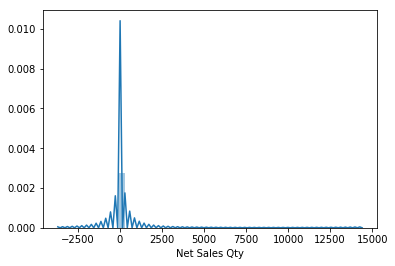

In [18]:
sns.distplot(sales['Net Sales Qty'])

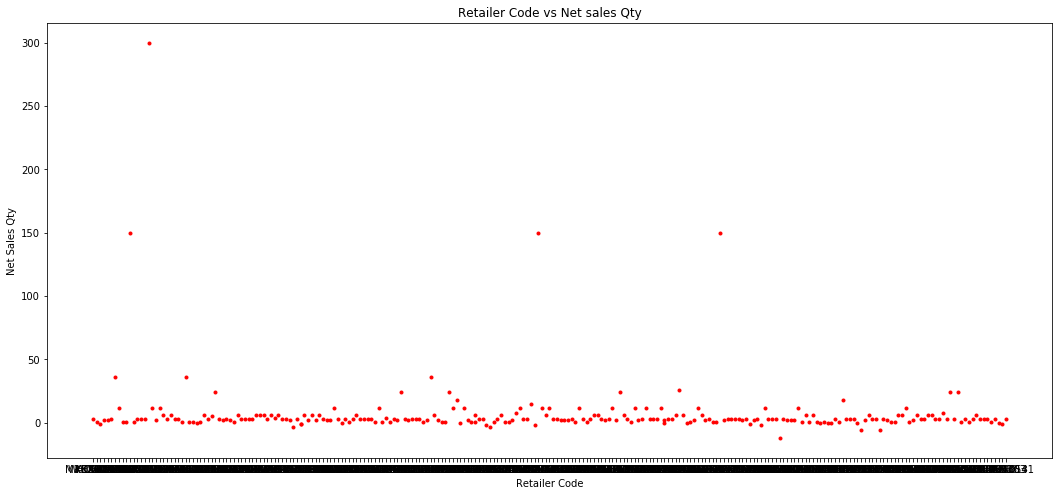

In [19]:
sampleSales = sales.sample(n=250)
plt.plot(sampleSales['Retailer Code'], sampleSales['Net Sales Qty'],'r.')
plt.title("Retailer Code vs Net sales Qty")
plt.xlabel('Retailer Code')
plt.ylabel('Net Sales Qty')
plt.gcf().set_size_inches(18, 8)

####  missing values

In [20]:
sales[sales.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
Retailer Code         0 non-null object
Rep                   0 non-null object
Product Code          0 non-null int64
Date                  0 non-null object
Net Sales Qty         0 non-null int64
Net Sales Value       0 non-null float64
Sales Return Qty      0 non-null int64
Sales Return Value    0 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 0.0+ bytes


# Data preparation

##### Although there is no missing values in sales file, there are lot of missing values in Retailer data file. 
##### Therefore we need to eliminate the Retailer Code of sales file compare to Retailer data file to do descriptive stat

In [21]:
# drop all rows in Retailer file with NA values
retailer = retailer.dropna()

In [22]:
retailer.head()

,Retailer Code,Sub Ret Cat Name,Zone Name,Region Name,Territory Name
0,ATHU0001,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
1,ATHU0003,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
2,ATHU0005,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
3,ATHU0006,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
4,ATHU0007,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA


In [23]:
retailer.shape

(5872, 5)

In [24]:
retailer[retailer.isnull().any(axis=1)].info() #we remove 346 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
Retailer Code       0 non-null object
Sub Ret Cat Name    0 non-null object
Zone Name           0 non-null object
Region Name         0 non-null object
Territory Name      0 non-null object
dtypes: object(5)
memory usage: 0.0+ bytes


In [25]:
list_retailer = retailer['Retailer Code'].unique()

In [27]:
list_retailer

array(['ATHU0001', 'ATHU0003', 'ATHU0005', ..., 'PETH0704', 'PETH0706',
       'PETH0708'], dtype=object)

In [28]:
sales = sales[sales['Retailer Code'].isin(list_retailer)]

In [29]:
sales.head()

,Retailer Code,Rep,Product Code,Date,Net Sales Qty,Net Sales Value,Sales Return Qty,Sales Return Value
0,BORE0001,BORELLA - R1,500004,"Wednesday, June 20 2012",4,1014.00,0,0.00
1,BORE0001,BORELLA - R1,500053,"Wednesday, June 20 2012",3,349.14,0,0.00
2,BORE0001,BORELLA - R1,500053,"Tuesday, August 28 2012",3,349.14,0,0.00
3,BORE0001,BORELLA - R1,500053,"Saturday, March 23 2013",-6,-775.86,6,775.86
4,BORE0001,BORELLA - R1,500069,"Monday, April 02 2012",3,590.04,0,0.00


In [30]:
sales.shape

(965231, 8)

In [31]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965231 entries, 0 to 532966
Data columns (total 8 columns):
Retailer Code         965231 non-null object
Rep                   965231 non-null object
Product Code          965231 non-null int64
Date                  965231 non-null object
Net Sales Qty         965231 non-null int64
Net Sales Value       965231 non-null float64
Sales Return Qty      965231 non-null int64
Sales Return Value    965231 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 66.3+ MB


#### we technically we removed 
## 172,239 Rows

In [32]:
sales['Net Sales Qty'].describe()

count    965231.000000
mean          5.911347
std          28.137569
min       -3688.000000
25%           2.000000
50%           3.000000
75%           6.000000
max       14400.000000
Name: Net Sales Qty, dtype: float64

C:\Users\werag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


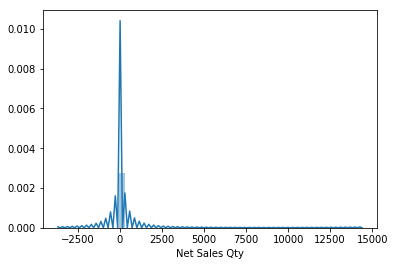

In [29]:
sns.distplot(sales['Net Sales Qty'])

In [34]:
sales.groupby(['Retailer Code','Product Code'])[['Net Sales Qty']].sum()

Net Sales Qty
Retailer Code Product Code               
ATHU0001      500003                   -3
              500004                   -2
              500031                    0
              500071                   -3
              500084                   -2
              500094                    5
              500110                    1
              500111                   -1
              500112                    1
              500119                   -5
              500129                   -1
              500131                   -2
              500137                   78
              500138                  -44
              500159                  -19
              500175                  -17
              500203                   -2
              500208                   -1
              500548                    5
              500551                    3
              500552                    1
              500664                   -1
              500784                    3
              500887                    0
              501170                    1
              501442                   12
              501453                   72
              501454                   11
              501456                   -1
              501457                    4
...                                   ...
PETH0708      501480                   30
              501481                    3
              502145                    3
              502147                    5
              502148                    3
              502149                   12
              502303                    3
              502333                    9
              502353                    0
              502359                    2
              502379                  108
              502427                  196
              502428                    4
              502429                   22
              502433                    3
              502434                    3
              502437                   15
              502440                    3
              502441                    0
              502446                    2
              502455                   12
              502472                    2
              502475                    2
              502500                   60
              502534                    3
              502624                    3
              502713                    3
              603756                   60
              604927                   42
              605464                   36

[342730 rows x 1 columns]

In [35]:
sales.groupby('Retailer Code')[['Net Sales Qty']].agg(['count','min','mean','max','std'])

Net Sales Qty                                
                      count  min       mean  max        std
Retailer Code                                              
ATHU0001                519 -115   2.552987   36  13.042128
ATHU0003               1178 -750   0.258913   48  24.755766
ATHU0005                 27  -10  -2.703704   -1   1.977077
ATHU0006                595 -284   0.890756   36  14.335911
ATHU0007                 32  -30  -1.156250   12   8.297335
ATHU0008                408 -450   1.306373   36  24.663071
ATHU0009                393 -288   1.111959   24  17.946994
ATHU0010                313  -45   3.316294   36   6.761431
ATHU0011                323  -90   3.052632   24   7.859027
ATHU0012                 60  -36   0.733333   24   7.485277
ATHU0013                281  -73   1.633452   48   8.914924
ATHU0014                 32  -30  -0.562500   12   7.242070
ATHU0015                416  -48   2.423077   24   5.402708
ATHU0017                 19   -6   1.473684   12   4.114587
ATHU0018                188  -12   2.867021   24   4.066082
ATHU0020                 37  -18  -3.810811    0   4.148881
ATHU0021                 34  -20  -1.029412   12   6.965218
ATHU0022                 59  -24   3.305085   36   9.397825
ATHU0024                124 -150   1.088710   36  20.648830
ATHU0025                 59  -24  -2.423729   18   7.867882
ATHU0026                  6    2  29.000000  150  59.407070
ATHU0027                  5  -12  -1.600000   12   8.619745
ATHU0028                  7    1   7.285714   36  12.789505
ATHU0030                  2    6   6.000000    6   0.000000
ATHU0031                159  -12   3.660377   20   3.851402
ATHU0032                209  -51   2.995215   18   5.820634
ATHU0033                 48  -36   0.729167   24   8.360850
ATHU0034                368  -21   4.646739   60   7.748442
ATHU0035                191 -300  -0.157068   36  28.048012
ATHU0038                419 -150   2.231504   48   8.575941
...                     ...  ...        ...  ...        ...
PETH0624                 95    1   7.410526  150  15.895600
PETH0625                 25    0  17.120000   48  16.297546
PETH0626                102    0   6.980392   48  10.728864
PETH0627                146    0   9.273973   72  14.592639
PETH0628                208    0  10.379808  150  24.217113
PETH0630                162   -3   6.314815   48   9.080367
PETH0631                152   -2   8.335526   48   9.500745
PETH0633                223   -3   9.439462  150  16.983688
PETH0634                 48   -2  11.166667  150  22.396175
PETH0635                 73  -36   5.890411   48  11.680422
PETH0636                 48    1   5.833333   48   7.909954
PETH0643                162    0   8.765432   54  10.689603
PETH0660                210    0   6.114286   48   6.481205
PETH0662                 69    1   4.173913   48   6.126021
PETH0667                224    0   7.142857  150  13.834614
PETH0668                154   -6   6.870130   36   6.414548
PETH0670                112    1   5.026786   12   3.916838
PETH0671                 84    1   7.702381  150  16.512704
PETH0673                 93   -3   6.903226   48   9.785820
PETH0674                 53    1   3.735849   12   2.558177
PETH0680                323    0   7.907121   72  11.261876
PETH0684                255    0   6.466667  150  12.418786
PETH0689                 68    0   8.691176  150  19.682751
PETH0691                253    0   7.486166   75  10.507216
PETH0693                134  -12   6.365672   36   7.048213
PETH0702                 53    1   9.037736   75  14.170612
PETH0703                  9    3   7.444444   24   7.299163
PETH0704                 81    0  14.283951  150  33.756938
PETH0706                 63    0   7.476190   48  10.918846
PETH0708                 88    0  11.840909   52  14.634934

[5872 rows x 5 columns]

#### pivot table before scaling

In [36]:
sales_pvt = sales.pivot_table(values='Net Sales Qty', index='Retailer Code', columns='Product Code', aggfunc='sum').fillna(0)
sales_pvt.head()

Product Code,500003,500004,500031,500034,500047,500053,500069,500070,500071,500084,...,605469,605470,605471,605472,605473,605474,605621,605636,605691,605854
Retailer Code,,,,,,,,,,,,,,,,,,,,,
ATHU0001,-3.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATHU0003,8.0,2.0,0.0,3.0,0.0,0.0,-4.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ATHU0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATHU0006,0.0,0.0,0.0,0.0,0.0,-3.0,1.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATHU0007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Take the sample 

In [37]:
sampleSales = sales.sample(n=250)


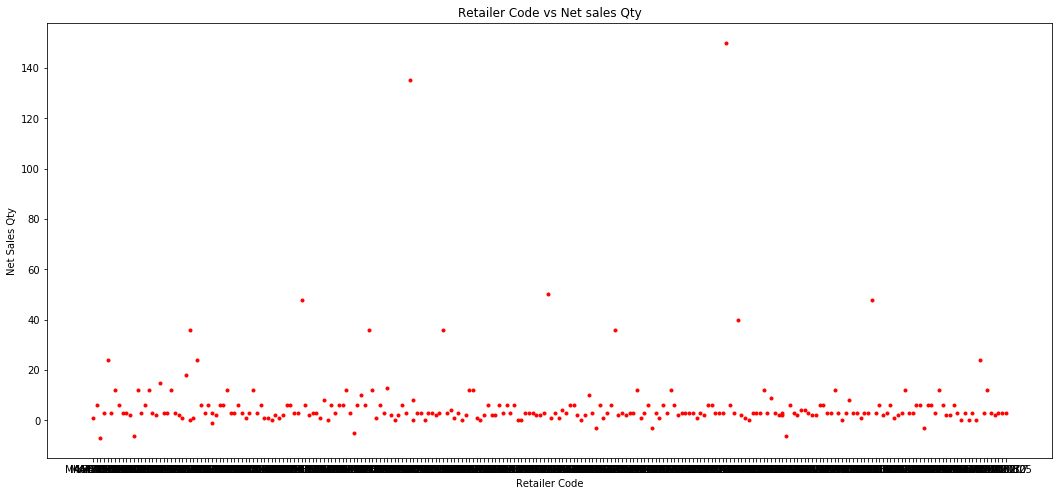

In [38]:
plt.plot(sampleSales['Retailer Code'], sampleSales['Net Sales Qty'],'r.')
plt.title("Retailer Code vs Net sales Qty")
plt.xlabel('Retailer Code')
plt.ylabel('Net Sales Qty')
plt.gcf().set_size_inches(18, 8)

#### boxplot with sales qty

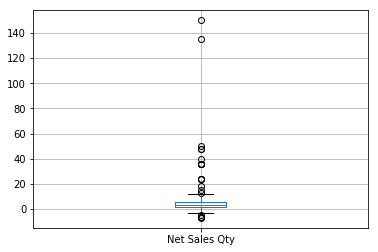

In [39]:
sampleSales.boxplot(column=['Net Sales Qty'])

#### Scaling Data

In [41]:
from sklearn.preprocessing import StandardScaler

C:\Users\werag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


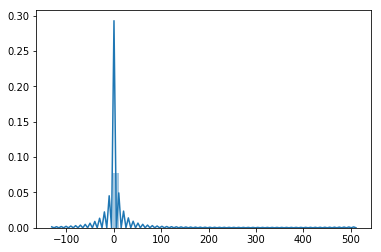

In [42]:
scaler = StandardScaler()
t_scaleQty = scaler.fit_transform(sales[['Net Sales Qty']])
sns.distplot(t_scaleQty)

In [43]:
# dfTest[['A', 'B']] = scaler.fit_transform(dfTest[['A', 'B']])
# fit that scaler to my df

sales[['Net Sales Qty']] = t_scaleQty
sales.head()

,Retailer Code,Rep,Product Code,Date,Net Sales Qty,Net Sales Value,Sales Return Qty,Sales Return Value
0,BORE0001,BORELLA - R1,500004,"Wednesday, June 20 2012",-0.067929,1014.00,0,0.00
1,BORE0001,BORELLA - R1,500053,"Wednesday, June 20 2012",-0.103468,349.14,0,0.00
2,BORE0001,BORELLA - R1,500053,"Tuesday, August 28 2012",-0.103468,349.14,0,0.00
3,BORE0001,BORELLA - R1,500053,"Saturday, March 23 2013",-0.423326,-775.86,6,775.86
4,BORE0001,BORELLA - R1,500069,"Monday, April 02 2012",-0.103468,590.04,0,0.00


#### pivot table using scaled data

In [44]:
scaled_sales_pvt = sales.pivot_table(values='Net Sales Qty', index='Retailer Code', columns='Product Code', aggfunc='sum').fillna(0)
scaled_sales_pvt.head()

Product Code,500003,500004,500031,500034,500047,500053,500069,500070,500071,500084,...,605469,605470,605471,605472,605473,605474,605621,605636,605691,605854
Retailer Code,,,,,,,,,,,,,,,,,,,,,
ATHU0001,-0.316707,-0.281167,-0.210087,0.000000,0.0,0.000000,0.000000,0.0,-0.316707,-0.281167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ATHU0003,-0.345945,-0.139008,0.000000,-0.313556,0.0,0.000000,-0.562334,0.0,-1.852096,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.174548,0.0
ATHU0005,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ATHU0006,0.000000,0.000000,0.000000,0.000000,0.0,-0.316707,-0.384635,0.0,-0.520493,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ATHU0007,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Building the model

In [45]:
# set pivot tbl as matrix
m_sales = scaled_sales_pvt.as_matrix()
# de-mean the data (normalize by each users mean)
retailer_rating_mean = np.mean(m_sales, axis = 1)
m_sales_demeaned = m_sales - retailer_rating_mean.reshape(-1, 1)
m_sales_demeaned

C:\Users\werag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[-0.18056302, -0.14502333, -0.07394394, ...,  0.13614349,
         0.13614349,  0.13614349],
       [ 0.17415059,  0.38108731,  0.52009536, ...,  0.52009536,
         0.34554762,  0.52009536],
       [ 0.0181687 ,  0.0181687 ,  0.0181687 , ...,  0.0181687 ,
         0.0181687 ,  0.0181687 ],
       ...,
       [-0.05297218, -0.05297218, -0.05297218, ..., -0.05297218,
        -0.05297218, -0.05297218],
       [-0.00770041, -0.00770041, -0.00770041, ..., -0.00770041,
        -0.00770041, -0.00770041],
       [-0.0407575 , -0.0407575 , -0.0407575 , ..., -0.0407575 ,
        -0.0407575 , -0.0407575 ]])

In [46]:
m_sales_demeaned.shape

(5872, 455)

#### Apply Singular Value Decomposition

In [47]:
from scipy.sparse.linalg import svds

In [48]:
U, sigma, Vt = svds(m_sales_demeaned, k = 15)
sigma = np.diag(sigma)

#### Making Predictions from the Decomposed Matrices
#### After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [49]:
all_retailers_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + retailer_rating_mean.reshape(-1, 1)

#### Making sales Recommendations


In [50]:
preds_sales = pd.DataFrame(all_retailers_predicted_ratings, columns = scaled_sales_pvt.columns)
preds_sales.head()

Product Code,500003,500004,500031,500034,500047,500053,500069,500070,500071,500084,...,605469,605470,605471,605472,605473,605474,605621,605636,605691,605854
0,-0.066085,-0.044502,-0.089620,-0.056655,-0.050351,-0.101882,-0.102102,-0.069659,-0.147795,-0.068939,...,-0.048677,-0.047816,-0.049493,-0.053767,-0.049691,-0.047579,-0.044659,-0.044435,-0.086969,-0.045831
1,-0.223091,-0.361226,-0.245246,-0.220183,-0.207350,-0.249086,-0.394425,-0.278144,-0.605863,-0.251533,...,-0.190849,-0.194626,-0.192827,-0.200523,-0.198287,-0.186060,-0.185351,-0.186797,-0.274194,-0.188199
2,-0.014210,-0.017160,-0.014826,-0.012788,-0.013313,-0.013851,-0.017898,-0.014878,-0.023233,-0.014610,...,-0.012273,-0.012343,-0.012404,-0.012588,-0.012560,-0.012286,-0.012259,-0.012239,-0.014248,-0.012254
3,-0.099429,-0.132521,-0.119842,-0.072991,-0.078043,-0.118325,-0.185586,-0.121793,-0.301579,-0.109612,...,-0.062645,-0.061410,-0.064531,-0.070002,-0.066934,-0.062323,-0.059246,-0.059230,-0.119876,-0.060371
4,-0.002199,-0.013774,-0.006002,-0.001755,-0.001913,-0.001472,-0.004111,-0.003028,-0.010529,-0.003909,...,-0.001021,-0.001289,-0.001505,-0.001640,-0.001624,-0.001277,-0.001166,-0.001212,-0.003975,-0.001169


#### Algorithm to collabarative filtering recommender System

In [51]:
def recommended_product(predictions_df, retailer_id, product_df, sales_df, n_recommendations=5) :
    # get and sort the retailer's predections
    retailer_row_num =  retailer.index[retailer['Retailer Code'] == retailer_id][0]
    sort_retailer_pred = preds_sales.iloc[retailer_row_num].sort_values(ascending=False)
    
    # get retailer info and merge in product information
    retailer_data = sales_df[sales_df['Retailer Code'] == (retailer_id)]
    retailer_full = retailer_data.merge(product_df, how = 'left', left_on = 'Product Code', right_on = 'Product Code').sort_values(['Net Sales Qty'], ascending=False)
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    
    recommendations = (product_df[~product_df['Product Code'].isin(retailer_full['Product Code'])].
         merge(pd.DataFrame(sort_retailer_pred).reset_index(), how = 'left',
               left_on = 'Product Code',
               right_on = 'Product Code').
         rename(columns = {retailer_row_num: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:n_recommendations, :-1]
                      )
    
    return retailer_full, recommendations
    
  
    

In [52]:
already_take, predictions = recommended_product(preds_sales, 'ATHU0031', product, sales, 5)

#### here represent the recommanded product to increse sales

In [53]:
predictions

,Product Code,Product Description,Product Group Name,Brand Name,Sub Product Description
56,501023,FEMS LOOPED TOWELS 10 PACK,Sanitary Towels,Fems,SANITARY LOOP
47,500274,NIMEX TOILET ROLLS VALUE PACK SINGLE,TOILET TISSUE,Nimex,TOILETROLLS
135,501719,FEMS SLIM WINGS 10 PACK,Sanitary Towels,Fems,SANITARY SLIM
1,500004,BIEN AIME COLOGNE 100ML,Cologne,Bien Aime,REGULAR COLOGNE
215,502303,BABY CHERAMY ECO PACK+VV HAND WASH 50ML,Soap,Baby soap,REGULAR SOAP


In [54]:
already_take = already_take[['Product Code', 'Product Description', 'Product Group Name', 'Brand Name', 'Sub Product Description']]

#### here repersent that the retailer already buy product

In [55]:
already_take.drop_duplicates().head()

,Product Code,Product Description,Product Group Name,Brand Name,Sub Product Description
38,501459,BABY CHERAMY SOAP 75G,Soap,Baby soap,REGULAR SOAP
142,603756,CHERAMY COTTON BUDS,COTTON BUDS,Cheramy,COTTON BUDS
147,604927,GODREJ EXPERT ORIG.POW.H/DYE 3G NAT BLK,Sachet,GODREJ,HAIR DYE POWDER
131,502703,BABY CHERAMY SOAP FLORALMOIST 75G YR14,Soap,Baby soap,FLORAL SOAP
157,605464,CHERAMY COTTON BUDS NEW,COTTON BUDS,Cheramy,COTTON BUDS
